In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Housing.csv", header="infer")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Zadanie 2

Wskaźniki statystyczne atrybutu docelowego mean-house-value.

Wykres słupkowy atrybutu mean-house-value, liczba kubków = 20 (20 bins).

Wyświetlić wykres słupkowy dla zmiennej {\em ocean-proximity}. Ile jest unikatowych wartości posiada ta zmienna?

Zbadać czy wartości brakujące (missing values) występują?

Zbadać czy zmienne total-bedroom i total-room zawierają wartości odstające?



In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


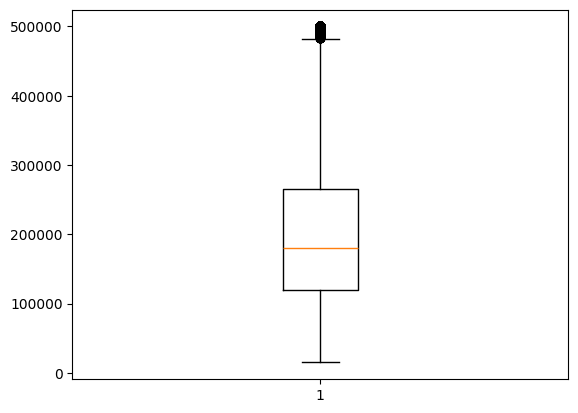

In [ ]:
plt.boxplot(df["median_house_value"])
plt.show()

Text(0.5, 1.0, 'Median price value')

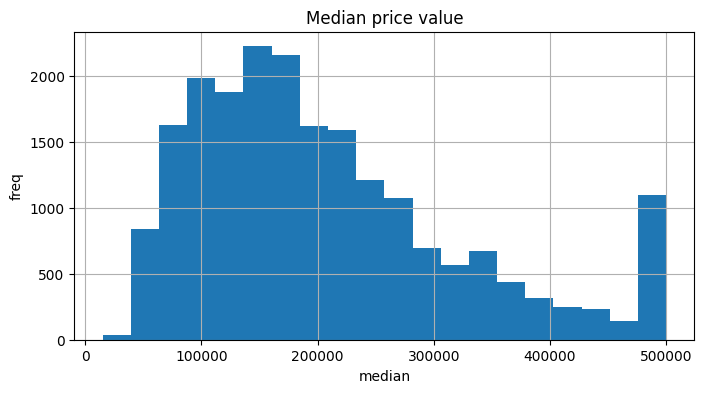

In [ ]:
df["median_house_value"].hist(bins=20, figsize=(8, 4))
plt.ylabel("freq")
plt.xlabel("median")
plt.title("Median price value")

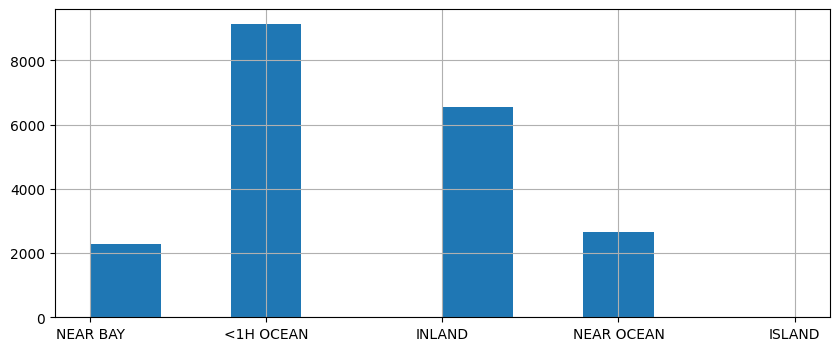

In [ ]:
df["ocean_proximity"].hist(figsize=(10,4))
plt.show()

In [ ]:
pd.value_counts(pd.unique(df["ocean_proximity"])).sum()

<ipython-input-9-b141765c264d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.unique(df["ocean_proximity"])).sum()


5

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
Q1 = df["total_bedrooms"].quantile(0.25)
Q3 = df["total_bedrooms"].quantile(0.75)
IQR = Q3 - Q1

treshold = 1.5
bedroom_without_outliers = df[(df["total_bedrooms"] >= Q1 - treshold*IQR) | (df["total_bedrooms"] <= Q3 + treshold*IQR)]
bedroom_without_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
Q1 = df["total_rooms"].quantile(0.25)
Q3 = df["total_rooms"].quantile(0.75)
IQR = Q3 - Q1

treshold = 1.5
room_without_outliers = df[(df["total_rooms"] >= Q1 - treshold*IQR) | (df["total_rooms"] <= Q3 + treshold*IQR)]
room_without_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
import plotly.express as px
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
fig = px.scatter_map(
    df,
    lat = "latitude",
    lon = "longitude",
    color="ocean_proximity",
    color_discrete_map={"NEAR BAY": "red",
                        "NEAR OCEAN": "black",
                        "<1H OCEAN": "yellow",
                        "INLAND": "fuchsia",
                        "ISLAND": "green",
                             },
    width = 600,
    height = 600
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
df[(df["latitude"] == 33.96)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5108,-118.31,33.96,43.0,2118.0,569.0,1266.0,500.0,1.7470,121000.0,<1H OCEAN
5109,-118.31,33.96,43.0,2149.0,493.0,1316.0,462.0,1.5280,131800.0,<1H OCEAN
5110,-118.31,33.96,46.0,1686.0,303.0,870.0,320.0,3.4643,136300.0,<1H OCEAN
5111,-118.31,33.96,48.0,2015.0,356.0,1020.0,338.0,4.0625,138700.0,<1H OCEAN
5113,-118.29,33.96,36.0,1717.0,417.0,902.0,368.0,1.4868,113200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
12099,-117.32,33.96,19.0,3216.0,666.0,1363.0,629.0,3.7585,144500.0,INLAND
12116,-117.23,33.96,5.0,9179.0,1361.0,4573.0,1294.0,5.2530,163300.0,INLAND
12275,-116.97,33.96,12.0,5876.0,1222.0,2992.0,1151.0,2.4322,112100.0,INLAND
12327,-116.51,33.96,16.0,4913.0,1395.0,2518.0,1132.0,1.4665,61100.0,INLAND


Text(0.5, 1.0, 'Correlation Map')

<Figure size 800x600 with 0 Axes>

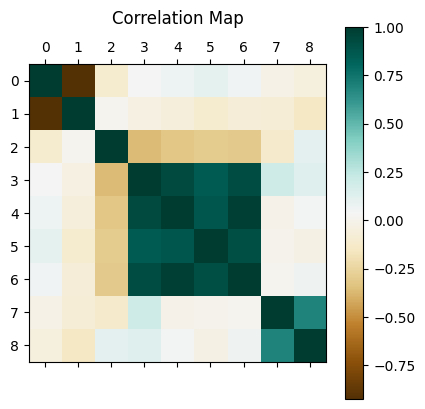

In [ ]:
corelation_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(8,6))
plt.matshow(corelation_matrix, cmap='BrBG')
plt.colorbar()
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12)

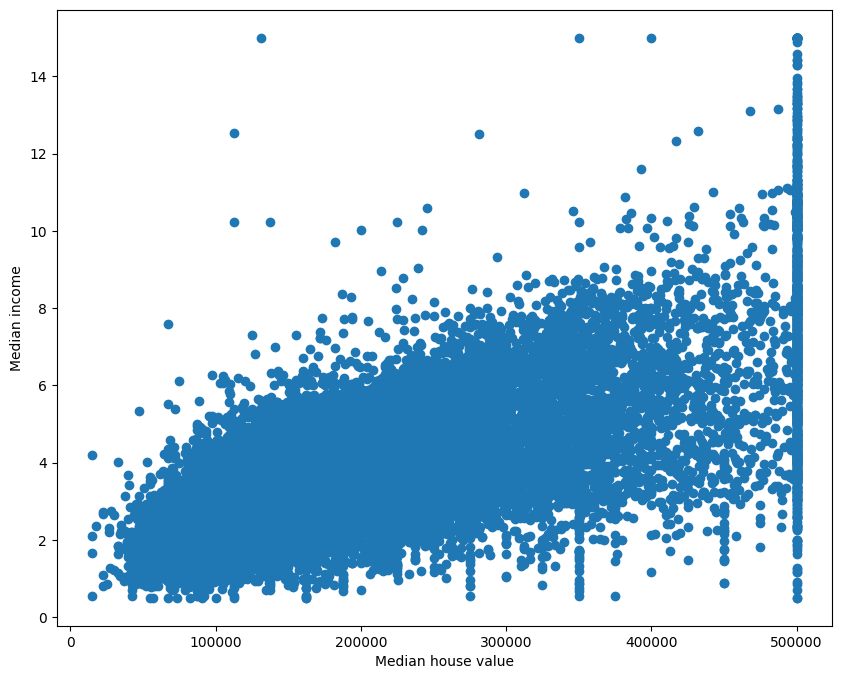

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Median house value")
plt.ylabel("Median income")
plt.scatter(df["median_house_value"].to_list(), df["median_income"].to_list())

plt.show()

In [ ]:
corelation_matrix['median_house_value'].sort_values()


,median_house_value
latitude,-0.144160
longitude,-0.045967
population,-0.024650
total_bedrooms,0.049686
households,0.065843
housing_median_age,0.105623
total_rooms,0.134153
median_income,0.688075
median_house_value,1.000000


In [ ]:
df['ocean_proximity'].replace(['NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', 'INLAND', 'ISLAND'], [0, 1, 2, 3, 4], inplace=True)
df.head()

<ipython-input-19-024662909638>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-19-024662909638>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=1)
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
rmse = np.sqrt(mse)
rmse

69045.27351855297

In [ ]:
mae = mean_absolute_error(y_test, lin_reg.predict(X_test))
mae

50433.17574570533

In [ ]:
df_no_outliers  = pd.concat([room_without_outliers, bedroom_without_outliers])
df_no_outliers['ocean_proximity'].replace(['NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', 'INLAND', 'ISLAND'], [0, 1, 2, 3, 4], inplace=True)
df_no_outliers.dropna(inplace=True)

<ipython-input-26-ae7f87bd6daf>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-26-ae7f87bd6daf>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
train_set, test_set = train_test_split(df_no_outliers, test_size=0.3, random_state=1)
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, lin_reg.predict(X_test))
rmse = np.sqrt(mse)
rmse

70670.05898041115

In [ ]:
mae = mean_absolute_error(y_test, lin_reg.predict(X_test))
mae

51370.78157258613

In [ ]:
room_Ave = df["total_rooms"].mean()
bedroom_Ave = df["total_bedrooms"].mean()
persons_per_house = df["population"].mean()

In [ ]:
df_replaced_columns = df.copy()
df_replaced_columns["total_rooms"] = room_Ave
df_replaced_columns["total_bedrooms"] = bedroom_Ave

df_replaced_columns["population"] = persons_per_house
df_replaced_columns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,2636.504233,537.870553,1424.946949,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,2636.504233,537.870553,1424.946949,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,2636.504233,537.870553,1424.946949,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,2636.504233,537.870553,1424.946949,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,2636.504233,537.870553,1424.946949,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2636.504233,537.870553,1424.946949,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,2636.504233,537.870553,1424.946949,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2636.504233,537.870553,1424.946949,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,2636.504233,537.870553,1424.946949,349.0,1.8672,84700.0,3


In [ ]:
train_set, test_set = train_test_split(df_replaced_columns, test_size=0.3, random_state=1)
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, lin_reg.predict(X_test))
rmse = np.sqrt(mse)
rmse

72492.3453960279

In [ ]:
mae = mean_absolute_error(y_train, lin_reg.predict(X_train))
mae

53344.63876672849

##Ćw 3

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [ ]:
ridge_model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(ridge_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, housing_predictions)
ling_rmse = np.sqrt(mse)
ling_rmse


48662.20062142174

In [ ]:
model = Lasso(alpha=0.99)
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, housing_predictions)
ling_rmse = np.sqrt(mse)
ling_rmse


72492.36006243536

In [ ]:
model = DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=10)
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, housing_predictions)
ling_rmse = np.sqrt(mse)
ling_rmse

62528.22126085064

In [ ]:
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['max_depth'] = arange(1, 20, 2)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -40593.985
Config: {'max_depth': 11}


In [ ]:
model = RandomForestRegressor(n_estimators=100, criterion='squared_error')
model.fit(X_train, y_train)
housing_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, housing_predictions)
ling_rmse = np.sqrt(mse)
ling_rmse

48662.20062142174

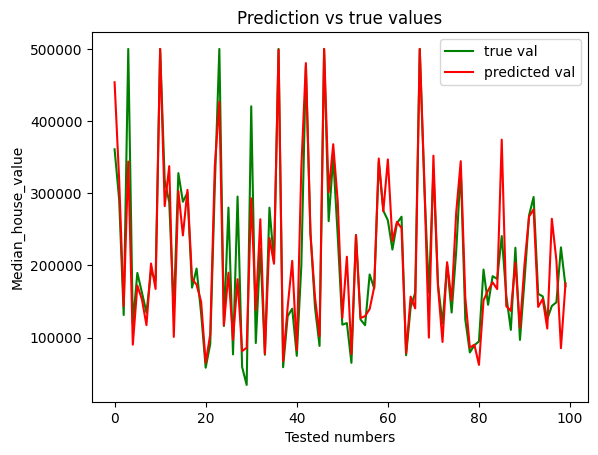

In [ ]:
X = np.arange(0, 100, 1)
y = y_test[:100]
z = housing_predictions[:100]

plt.plot(X, y, color="green", label = "true val")
plt.plot(X, z, color="red", label = "predicted val")
plt.xlabel("Tested numbers")
plt.ylabel("Median_house_value")
plt.title("Prediction vs true values")
plt.legend()
plt.show()